<h1>Target</h1>
predicting future sales

<h1>Name: Abdallah Moataz Kamal</h1>

In [165]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns',None)

In [166]:
df=pd.read_csv('advertising.csv')

In [167]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [169]:
df.shape

(200, 4)

In [170]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

<h1>preprocessing</h1>

In [171]:
df.isnull().sum()/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [172]:
df.duplicated().sum()

0

<h1>EDA</h1>

Text(0.5, 1.0, 'Sales vs Tv')

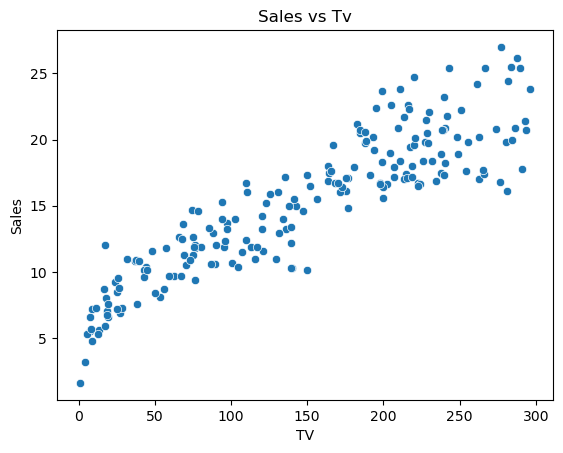

In [173]:
sns.scatterplot(x='TV',y='Sales',data=df)
plt.title('Sales vs Tv')

Text(0.5, 1.0, 'Sales vs Radio')

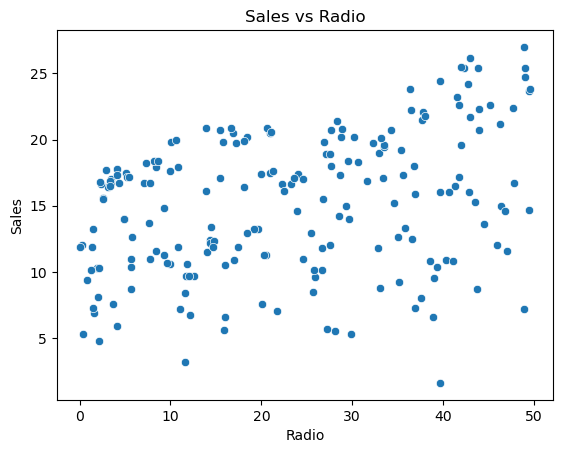

In [174]:
sns.scatterplot(x='Radio',y='Sales', data=df)
plt.title('Sales vs Radio')

Text(0.5, 1.0, 'Sales Vs Newspaper')

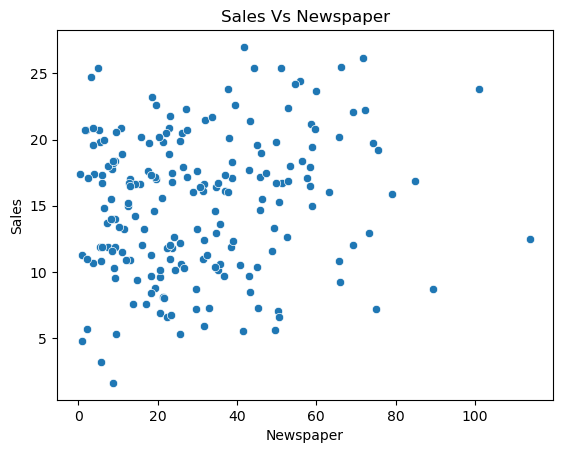

In [175]:
sns.scatterplot(x='Newspaper',y='Sales',data=df)
plt.title('Sales Vs Newspaper')

<Axes: >

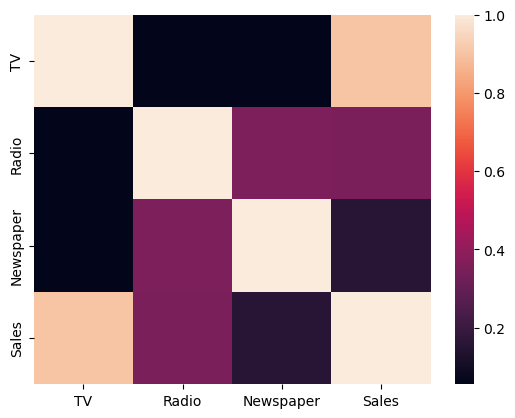

In [176]:
sns.heatmap(df.corr())

In [177]:
cor = df.corr()
cor_target = abs(cor["Sales"])

relevant_features = cor_target
relevant_features = pd.DataFrame(relevant_features)
relevant_features.sort_values("Sales" , ascending=False)

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


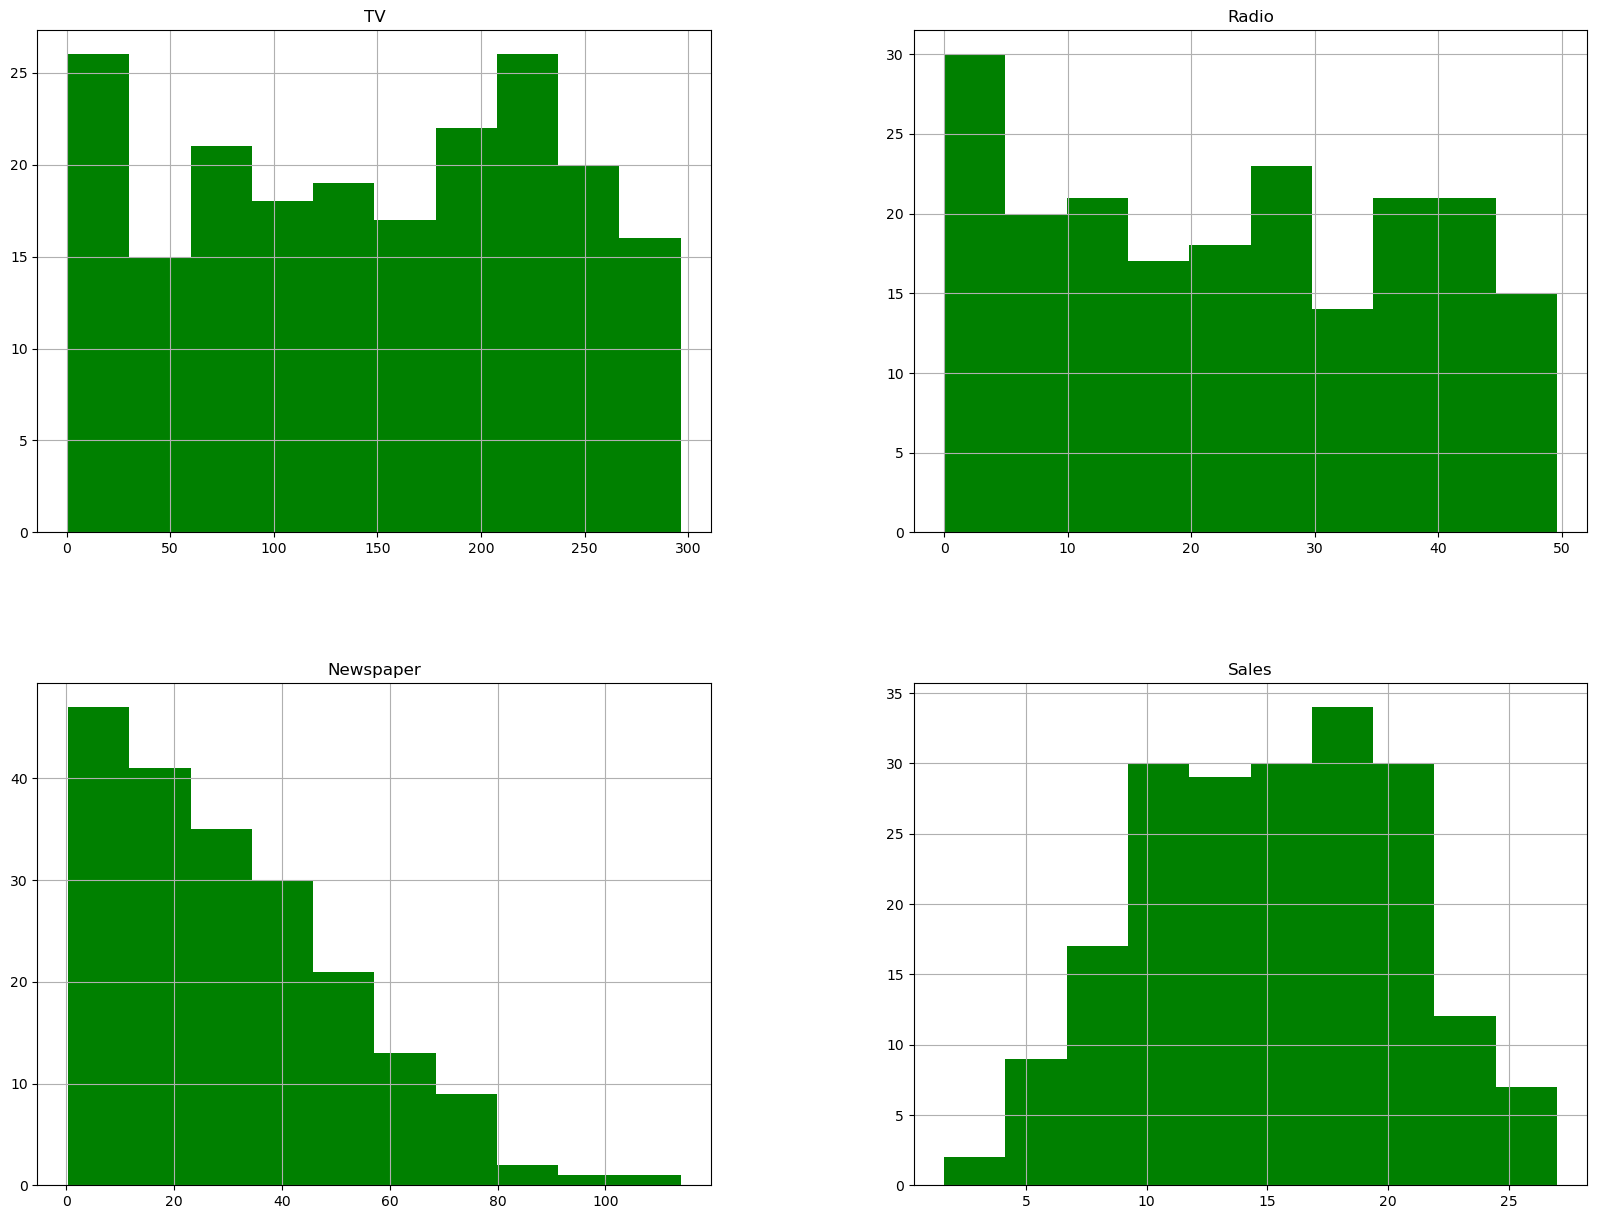

In [178]:
df.hist(figsize=(20, 15),color='green')
plt.show()

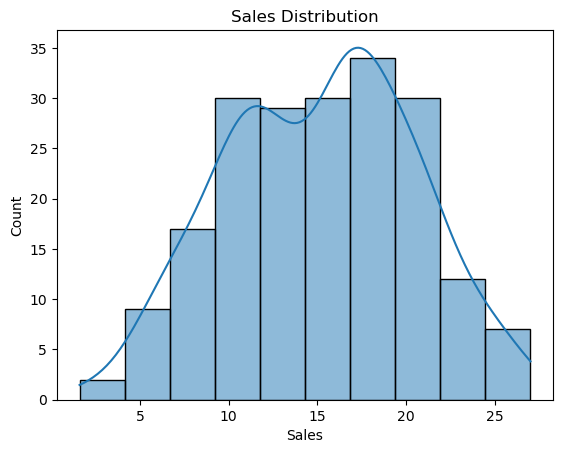

In [179]:
sns.histplot(df['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

In [180]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<h1>ouliers</h1>

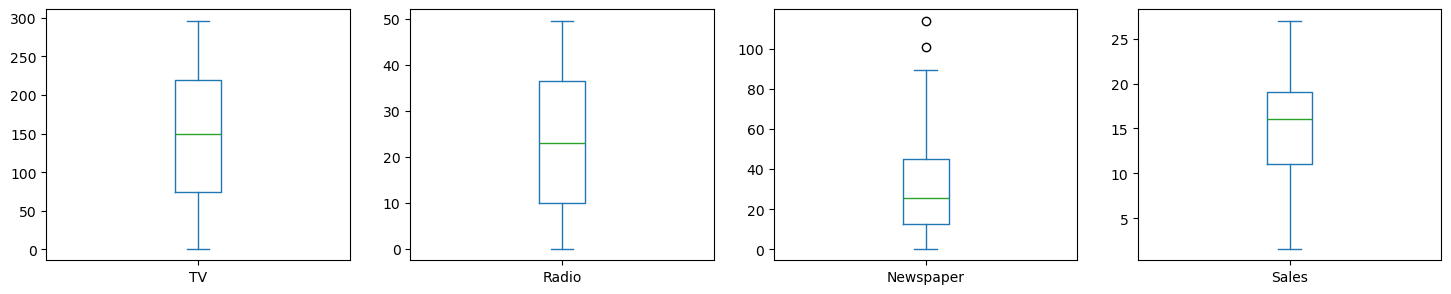

In [181]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) , layout = (4,4))
plt.show()

<Axes: xlabel='Newspaper'>

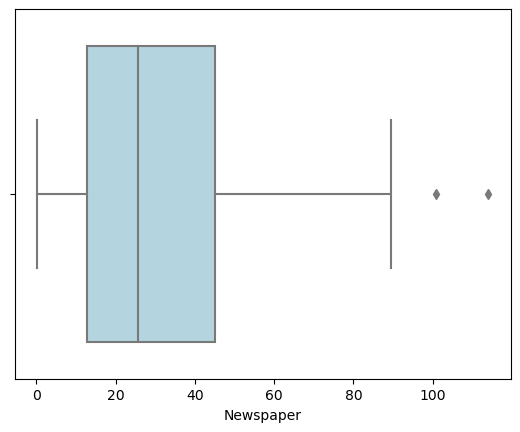

In [182]:
sns.boxplot(x=df['Newspaper'],color='lightblue')

In [183]:
df.shape

(200, 4)

In [188]:
print('outliers',df[(df['Newspaper']>100)].count())

outliers TV           2
Radio        2
Newspaper    2
Sales        2
dtype: int64


In [189]:
df = df[(df['Newspaper'] < 100 )]
df.shape

(198, 4)

<h1>scaling</h1>

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaler=StandardScaler()

In [192]:
colums=['TV','Radio','Newspaper']


In [193]:
df[colums]=scaler.fit_transform(df[colums])

In [194]:
df

,TV,Radio,Newspaper,Sales
0,0.978697,0.989521,1.932998,22.1
1,-1.199012,1.090705,0.751313,10.4
2,-1.519332,1.535913,1.937901,12.0
3,0.056456,1.225616,1.408349,16.5
4,0.400243,-0.831784,1.403446,17.9
...,...,...,...,...
195,-1.272932,-1.310720,-0.783407,7.6
196,-0.615864,-1.229773,-1.062892,14.0
197,0.355657,-0.932968,-1.146248,14.8
198,1.606431,1.272836,1.785900,25.5


In [195]:
from sklearn.model_selection import train_test_split


In [196]:
x=df.drop('Sales',axis=1).values
y=df['Sales'].values

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [222]:
from sklearn.linear_model import LinearRegression

In [223]:
model=LinearRegression()

In [224]:
model.fit(x_train,y_train)

LinearRegression()

In [225]:
model.score(x_train,y_train)

0.9012662419519466

In [226]:
model.score(x_test,y_test)

0.8980378687868961

In [227]:
y_pred=model.predict(x_test)

In [239]:
prediction=pd.DataFrame({'actual':y_test,'predictied': y_pred})
prediction.head(15)

,actual,predictied
0,7.6,7.739136
1,17.0,19.566553
2,16.0,18.270664
3,17.5,18.316829
4,23.7,20.848886
5,18.4,18.029957
6,20.2,21.555313
7,4.8,5.223778
8,14.0,12.533250
9,16.6,18.181206


<h1>evaluating</h1>

In [244]:
from sklearn.metrics import r2_score

In [246]:
r2=r2_score(y_test,y_pred)
r2 #when its closer to one its better 

0.8980378687868961

In [247]:
from sklearn.metrics import mean_squared_error

In [250]:
mse = mean_squared_error(y_test, y_pred)
mse
# the squared differences between actual and predicted values. #Lower MSE means better performance.


2.149804623979688

In [251]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [253]:
rmse # how far the predictions are from the actual sales on average.

1.4662212056779453